# <font color=#0404B4>**LAB 02 - TRỰC QUAN HÓA DỮ LIỆU** </font>

### <font color=#0404B4> Bảng thành viên nhóm </font>
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |
| <center>20120053<center>  |   <center>Nguyễn Thành Đạt<center>   | 
| <center>20120071<center>  |<center>Nguyễn Thị Bích Hà<center> |
| <center>20120084<center>  | <center>Nguyễn Văn Hiếu<center> |
| <center>20120113<center>  | <center>Lê Nguyên Khang<center> |

# <font color=#0404B4>Import thư viện</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import country_converter as coco
import json
from unidecode import unidecode
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import geopandas as gpd
from ipywidgets import interact
import re
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter('ignore')


# <font color=#0404B4> A. Thu thập dữ liệu</font>

### Tại sao lại chọn bộ dữ liệu này?
Nhóm muốn tìm hiểu tuổi thọ trung bình của các nước trên thế giới, cụ thể hơn là về tỉ lệ sinh, tỉ lệ tử và những ảnh hưởng cụ thể tác động lên các yếu tố đã được đề cập. Những quốc gia có tuổi thọ trung bình ở những mức độ cụ thể sẽ thể hiện điều gì qua các yếu tố liên quan khác, liệu có sự liên quan nào giữa tuổi thọ trung bình và mức sống hoặc điều kiện phát triển của một quốc gia hay không. Nhóm có rất nhiều câu hỏi muốn khám phá từ chủ đề tuổi tác trung bình của một quốc gia nên đã quyết định chọn bộ dữ liệu này.

Nhóm đã chọn bộ dữ liệu cung cấp thông tin về tuổi thọ trung bình và các yếu tố liên quan của các quốc gia trên thế giới, và bộ dữ liệu này được nhóm lấy từ [Kaggle](https://www.kaggle.com/datasets/census/international-data?select=midyear_population_5yr_age_sex.csv&fbclid=IwAR1iVkXkPgwGhwS5BuKX7oZnUKSWuAlsCq2odeJZ2rCXMAE_xN_BjgJEpMk).



### Nguồn gốc và giấy phép sử dụng của bộ dữ liệu?
Bộ dữ liệu này được tạo bởi [Cục điều tra dân số Hoa Kỳ](http://www.census.gov/), cung cấp các ước tính về dân số các quốc gia kể từ năm 1950 và dự đoán đến năm 2050. Cụ thể, bộ dữ liệu bao gồm các số liệu dân số giữa năm được chia nhỏ theo độ tuổi và phân bổ giới tính khi sinh. Ngoài ra, chúng cung cấp dữ liệu chuỗi thời gian cho các thuộc tính bao gồm tỷ lệ sinh, tỷ lệ sinh, tỷ lệ tử vong và tỷ lệ di cư.

Bộ dữ liệu được cho phép sử dụng với mục đích phân tích 

   **Lưu ý:** Các quốc gia và khu vực được Bộ Ngoại giao Hoa Kỳ công nhận phải có dân số ít nhất là 5.000 người. Và bộ dữ liệu này được đăng tải vào năm 2017, tức là các dữ liệu được cung cấp từ năm 2018 trở đi được xem là dữ liệu dự đoán.



<a name="2"></a>
# <font color=#0404B4> B. Khám phá và tiền xử lý dữ liệu</font>


### 1. Đọc dữ liệu từ file và merge dữ liệu lại thành 1 dataframe

Do bộ dữ liệu có nhiều file csv riêng lẻ nên nhóm thực hiện merge các file cần phân tích lại và lưu vào một DataFrame `df`.

- `df1` chứa tập dữ liệu nằm trong file `mortality_life_expectancy.csv`, file này chứa các thông tin liên quan đến tuổi thọ trung bình của các quốc gia.

In [2]:
df1 = pd.read_csv("mortality_life_expectancy.csv")

In [3]:
df1.shape

(15106, 15)

- `df2` chứa tập dữ liệu nằm trong file `age_specific_fertility_rates.csv`, file này chứa các thông tin liên quan đến tỷ suất sinh đặc trưng theo từng độ tuổi.

In [4]:
df2 = pd.read_csv("age_specific_fertility_rates.csv")

In [5]:
df2.shape

(15106, 13)

- `df3` chứa tập dữ liệu nằm trong file `birth_death_growth_rates.csv`, file này chứa các thông tin liên quan đến tỷ lệ sinh - tử và một số vấn đề liên quan của các quốc gia.

In [6]:
df3 = pd.read_csv("birth_death_growth_rates.csv")

In [7]:
df3.shape

(15109, 8)

Ta tiến hành merge cả 3 DataFrame trên.

In [8]:
merge_df=pd.merge(df1,df3,on=['country_code', 'country_name', 'year'])

In [9]:
df=pd.merge(merge_df,df2,on=['country_code', 'country_name', 'year'])

Sau khi merge, DataFrame `df` tổng hợp có tổng cộng 15106 dòng và 30 cột.

In [10]:
df.shape

(15106, 30)

In [11]:
df.head(10)

,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,...,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,...,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,...,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661
2,SI,Slovenia,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,...,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,0.6879,1.0660
3,SI,Slovenia,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,...,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,0.6929,1.0660
4,SI,Slovenia,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,...,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,0.6979,1.0661
5,SI,Slovenia,2026,3.64,4.07,3.18,79.68,76.19,83.41,4.26,...,7.8,57.1,107.7,78.9,27.9,7.1,2.7,1.4523,0.7029,1.0660
6,SI,Slovenia,2027,3.61,4.03,3.16,79.81,76.33,83.53,4.23,...,7.9,57.4,108.2,79.6,28.1,7.3,2.8,1.4626,0.7079,1.0661
7,SI,Slovenia,2028,3.58,4.00,3.14,79.94,76.47,83.65,4.19,...,8.0,57.7,108.6,80.2,28.5,7.5,2.9,1.4729,0.7130,1.0659
8,SI,Slovenia,2029,3.56,3.97,3.12,80.08,76.61,83.77,4.15,...,8.1,58.0,109.0,80.8,29.0,7.6,3.0,1.4832,0.7179,1.0660
9,SI,Slovenia,2030,3.53,3.93,3.10,80.21,76.75,83.89,4.12,...,8.1,58.3,109.4,81.7,29.5,7.8,3.1,1.4936,0.7229,1.0660


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Mỗi dòng thể hiện thông tin của 1 quốc gia hoặc vùng lãnh thổ trong 1 năm, ví dụ như: thông tin tử vong và tuổi thọ trung bình (chia thành 2 nhóm nam và nữ), tỉ lệ sinh - tử (chi tiết ra thành những khoảng độ tuổi), tỉ lệ tăng trưởng.
* **Không** có dòng nào có ý nghĩa khác nhau.

### 3. Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược lại. Các thuộc tính `country_code`, `country_name`, `year` được xem là những thuộc tính khóa chính, định danh cho từng mẫu của dataframe.

In [12]:
check_duplicated = set(df.loc[:,['country_code', 'country_name', 'year']].duplicated())

if True in check_duplicated:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
if (have_duplicated_rows == True):
    print('Có dòng dữ liệu bị lặp')
else:
    print('Không có dòng dữ liệu nào bị lặp')

Không có dòng dữ liệu nào bị lặp


<h3> 4. Mỗi cột có ý nghĩa gì?</h3>

|STT|Tên cột dữ liệu | <center>Mô tả<center> |<center> Đơn vị <center>|
|--|:------:| ---| --- |
|1|country_code|<center>Mã quốc gia/ mã vùng lãnh thổ<center>|
|2|country_name| <center>Tên quốc gia/ vùng lãnh thổ<center>|
|3|year|<center>Năm thu thập<center>| <center>Năm<center>
|4|infant_mortality| <center> Tỷ lệ tử vong sơ sinh<center>| <center>Số trẻ em chết sơ sinh/1.000 dân số<center>|
|5|infant_mortality_male|<center>Tỷ lệ tử vong sơ sinh ở nam<center>|  <center>Số trẻ em chết sơ sinh/1.000 dân số<center>| 
|6|infant_mortality_female|<center>Tỷ lệ tử vong sơ sinh ở nữ<center>| <center>Số trẻ em chết sơ sinh/1.000 dân số<center>|
|7|life_expectancy|<center>Tuổi thọ trung bình<center>| <center>Năm<center>|
|8|life_expectancy_male|<center>Tuổi thọ trung bình ở nam<center>| <center>Năm<center>|
|9|life_expectancy_female|<center>Tuổi thọ trung bình ở nữ<center>| <center>Năm<center>|
|10|mortality_rate_under5|<center>Tỷ lệ tử vong `dưới 5` tuổi<center>| |
|11|mortality_rate_under5_male|<center>Tỷ lệ tử vong `dưới 5` tuổi ở nam<center>| |
|12|mortality_rate_under5_female|<center>Tỷ lệ tử vong `dưới 5` tuổi ở nữ<center>| |
|13|mortality_rate_1to4|<center>Tỷ lệ tử vong `1-4` tuổi<center>| |
|14|mortality_rate_1to4_male|<center>Tỷ lệ tử vong `1-4` tuổi ở nam<center>|  |
|15|mortality_rate_1to4_female|<center>Tỷ lệ tử vong `1-4`tuổi ở nữ<center>|  |
|16|crude_birth_rate|<center>Tỷ lệ sinh thô<center>|<center>Sinh sản/1.000 dân số<center>|
|17|crude_death_rate|<center>Tỷ lệ tử vong thô<center>|<center>Số người chết/1.000 dân số<center>|
|18|net_migration|<center>Tỷ lệ di cư<center>|<center>Số người di dân/1.000 dân số<center>|
|19|rate_natural_increase|<center>Tỷ lệ tăng tự nhiên<center>|<center>%<center>|
|20|growth_rate|<center>Tỷ lệ tăng trưởng<center>|<center>%<center>|
|21|fertility_rate_15_19|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `15-19`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|22|fertility_rate_20_24|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `20-24`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|23|fertility_rate_25_29|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `25-29`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|24|fertility_rate_30_34|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `30-34`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|25|fertility_rate_35_39|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `35-39`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|26|fertility_rate_40_44|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `40-44`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|27|fertility_rate_45_49|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `45-49`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|28|total_fertility_rate|<center>Tỷ lệ sinh sản tổng thể <center>|<center>con/phụ nữ<center>|
|29|gross_reproduction_rate|<center>Tỷ lệ sinh con gái<center>|<center>con/phụ nữ<center>|
|30|sex_ratio_at_birth|<center>Tỷ lệ giới tính khi sinh<center>|<center>Số trẻ sinh nam chia sô trẻ sinh nữ<center>|



* **Thời gian cập nhật dữ liệu:** năm 2017

### 5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15106 entries, 0 to 15105
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_code                  15106 non-null  object 
 1   country_name                  15106 non-null  object 
 2   year                          15106 non-null  int64  
 3   infant_mortality              15106 non-null  float64
 4   infant_mortality_male         15106 non-null  float64
 5   infant_mortality_female       15106 non-null  float64
 6   life_expectancy               15106 non-null  float64
 7   life_expectancy_male          15106 non-null  float64
 8   life_expectancy_female        15106 non-null  float64
 9   mortality_rate_under5         15106 non-null  float64
 10  mortality_rate_under5_male    15106 non-null  float64
 11  mortality_rate_under5_female  15106 non-null  float64
 12  mortality_rate_1to4           15106 non-null  float64
 13  m

Tạm thời, ta thấy các cột đã ở đúng kiểu dữ liệu, cụ thể `country_code` và `country_name` ở dạng dữ liệu phân loại, còn lại tất cả các cột đều thể hiện độ tuổi và tỉ lệ nên ở dạng `float`, cột thể hiện thời gian (năm) thì ở dạng `int`. Do đó có vẻ như **không** có cột nào sở hữu kiểu dữ liệu không phù hợp cả.

### 6. Với mỗi cột, các giá trị được phân bố như thế nào?

#### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 28 cột thuộc nhóm numeric:
|<center>STT</center>  | <center>Tên cột</center>  | <center>STT</center>  | <center>Tên cột</center> |
|-|  -| -  |  -|
| <center>1| <center>year | <center>15| <center>crude_death_rate|
| <center>2| <center>infant_mortality| <center>16| <center>net_migration|
| <center>3| <center>infant_mortality_male| <center>17| <center>rate_natural_increase|
| <center>4| <center>infant_mortality_female | <center>18| <center>growth_rate|
| <center>5| <center>life_expectancy| <center>19| <center>fertility_rate_15_19|
| <center>6| <center>life_expectancy_male| <center>20| <center>fertility_rate_20_24|
| <center>7| <center>life_expectancy_female| <center>21| <center>fertility_rate_25_29|
| <center>8| <center>mortality_rate_under5| <center>22| <center>fertility_rate_30_34|
| <center>9| <center>mortality_rate_under5_male| <center>23| <center>fertility_rate_35_39|
| <center>10| <center>mortality_rate_under5_female| <center>24| <center>fertility_rate_40_44|
| <center>11| <center>mortality_rate_1to4| <center>25| <center>fertility_rate_45_49|
| <center>12| <center>mortality_rate_1to4_male| <center>26| <center>total_fertility_rate|
| <center>13| <center>mortality_rate_1to4_female| <center>27| <center>gross_reproduction_rate|
| <center>14| <center>crude_birth_rate| <center>28| <center>sex_ratio_at_birth|

In [14]:
pd.set_option('display.max_colwidth', 200)
numerical_cols = df[df.select_dtypes(exclude=['object']).columns]
numerical_cols.head(5)

,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,...,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44,...,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81,...,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661
2,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78,...,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,0.6879,1.0660
3,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74,...,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,0.6929,1.0660
4,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71,...,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,0.6979,1.0661


Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu, min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 28 cột là các thuộc tính thuộc kiểu dữ liệu **numerical**.

In [15]:
def missing_ratio(c):
    return  c.isna().sum()/len(df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,...,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
missing_ratio,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
min,1950.0,1.15,0.22,0.73,10.01,9.82,10.21,1.44,1.66,1.21,...,0.0,9.5,34.1,23.1,7.2,0.0,0.0,0.6621,-9.0000,-9.0000
max,2050.0,298.30,314.65,281.22,91.58,88.69,94.97,455.12,466.23,443.65,...,237.4,363.3,369.2,338.3,282.9,201.3,105.8,8.0700,3.9754,1.4696


Nhận thấy không có giá trị nào bị thiếu ở tất cả các cột (phần trăm thiếu bằng 0%).
Với dữ liệu ở cột  `year`, dữ liệu được thu thập và dự đoán từ năm 1950 đến năm 2050.

#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 2 cột thuộc nhóm categorical: `country_code`, `country_name`.


In [16]:
pd.set_option('display.max_colwidth', 200)
object_cols = df[df.select_dtypes(include=['object']).columns]
object_cols.head(5)

,country_code,country_name
0,SI,Slovenia
1,SI,Slovenia
2,SI,Slovenia
3,SI,Slovenia
4,SI,Slovenia


Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu, số lượng giá trị khác nhau (không xét giá trị thiếu), list/ array các giá trị khác nhau (không xét giá trị thiếu).
- Kết quả được lưu vào dataframe `cate_col_profiles_df`.
- Dataframe này có 3 dòng là `missing_ratio`, `num_diff_vals`, `ratio_diff_vals`; và có 2 cột là các thuộc tính có kiểu dữ liệu **categorical**.

In [17]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()

cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

,country_code,country_name
missing_ratio,0.0,0.0
num_diff_vals,228,228
ratio_diff_vals,"{'BT': 0.01, 'DJ': 0.01, 'NI': 0.01, 'GV': 0.01, 'CB': 0.01, 'CD': 0.01, 'GB': 0.01, 'UG': 0.01, 'LE': 0.01, 'WI': 0.01, 'AO': 0.01, 'BR': 0.01, 'GH': 0.01, 'NU': 0.01, 'HA': 0.01, 'NP': 0.01, 'PA...","{'Bhutan': 0.01, 'Djibouti': 0.01, 'Nigeria': 0.01, 'Guinea': 0.01, 'Cambodia': 0.01, 'Chad': 0.01, 'Uganda': 0.01, 'Gabon': 0.01, 'Brazil': 0.01, 'Angola': 0.01, 'Western Sahara': 0.01, 'Ghana': ..."


- Nhận thấy không có giá trị nào bị thiếu.
- Tổng cộng có 228 giá trị khác nhau ở `country_code` và  `country_name`, đại diện cho 228 quốc gia trên thế giới.

### 7. Có cần phải tiền xử lý dữ liệu hay không?

Do ở trên ta đã kiểm tra và nhận thấy rằng các cột đều đang ở đúng kiểu dữ liệu của nó nên ở đây, ta sẽ kiểm tra xem các cột có đầy đủ dữ liệu hay không.

In [18]:
df.isnull().any()

country_code                    False
country_name                    False
year                            False
infant_mortality                False
infant_mortality_male           False
infant_mortality_female         False
life_expectancy                 False
life_expectancy_male            False
life_expectancy_female          False
mortality_rate_under5           False
mortality_rate_under5_male      False
mortality_rate_under5_female    False
mortality_rate_1to4             False
mortality_rate_1to4_male        False
mortality_rate_1to4_female      False
crude_birth_rate                False
crude_death_rate                False
net_migration                   False
rate_natural_increase           False
growth_rate                     False
fertility_rate_15_19            False
fertility_rate_20_24            False
fertility_rate_25_29            False
fertility_rate_30_34            False
fertility_rate_35_39            False
fertility_rate_40_44            False
fertility_ra

Ta nhận thấy các cột không xuất hiện tình trạng thiếu dữ liệu. Nên tạm thời ta sẽ không thực hiện việc tiền xử lý đối với dữ liệu. Tuy nhiên, nhóm sẽ có thể thực hiện việc tiền xử lý ở phần phân tích tùy thuộc vào hoàn cảnh nhóm sẽ thực hiện.

<a name="6"></a>
# <font color=#0404B4> C. Khám phá mối quan hệ trong dữ liệu</font>

### 1. Tổng quan

### 2. Phân tích

### 3. Phân tích tỉ lệ sinh sản theo độ tuổi trong 20 năm (kể từ lần cập nhật dữ liệu cuối cùng) của các quốc gia ở khu vực ASEAN

**Ý nghĩa khi trả lời câu hỏi:** 

* Tương quan giữa tỉ lệ sinh sản theo độ tuổi với nhau, tương quan giữa tỉ lệ sinh sản với độ tuổi trong khu vực Đông Nam Á chúng ta trước đây và hiện tại.
* Sự phân bố tỉ lệ sinh sản theo độ tuổi.
* Sự thay đổi, biến thiên của tỉ lệ sinh sản theo độ tuổi của các nước trong khổi ASEAN theo từng năm.

**Nguồn cảm hứng đặt câu hỏi:**

* Thêm kiến thức về các mối quan hệ giữa tỉ lệ sinh sản theo độ tuổi với nhau và giữa tỉ lệ sinh sản với độ tuổi. 

Trích những thuộc tính cầm thiết để phân tích tỉ lệ sinh sản theo độ tuổi của các quốc gia/vùng lãnh thổ


In [19]:
detail_fertility=df.loc[:,['country_code','country_name','year','fertility_rate_15_19','fertility_rate_20_24','fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44','fertility_rate_45_49','total_fertility_rate','gross_reproduction_rate','sex_ratio_at_birth']].copy()

Chọn ra dữ liệu 20 năm gần đây nhất: từ năm 1997 đến năm 2017

In [20]:
detail_fertility=detail_fertility[(detail_fertility.year <= 2017) & (detail_fertility.year >= 1997)]

Các thành viên trong ASEAN:

|<center>STT | <center>Tên quốc gia| <center>country_name|
|-|  -| -  |
| <center>1| <center>Brunei | <center>Brunei|
| <center>2| <center>Campuchia| <center>Cambodia|
| <center>3| <center>Đông Timo| <center>Timor-Leste
| <center>4| <center>Indonesia | <center>Indonesia|
| <center>5| <center>Lào| <center>Laos|
| <center>6| <center>Malaysia| <center>Malaysia|
| <center>7| <center>Myanmar| <center>Burma|
| <center>8| <center>Philippine| <center>Philippines|
| <center>9| <center>Singapore| <center>Singapore|
| <center>10| <center>Thái Lan| <center>Thailand|
| <center>11| <center>Việt Nam| <center>Vietnam|


In [21]:
country_name_ASEAN=['Brunei','Cambodia','Timor-Leste','Indonesia','Laos','Malaysia','Burma','Philippines','Singapore','Thailand','Vietnam']
detail_fertility=detail_fertility[detail_fertility.country_name.isin(country_name_ASEAN)]

Dùng **biểu đồ boxplot** để quan sát được phân bố tỉ lệ sinh ở các độ tuổi:

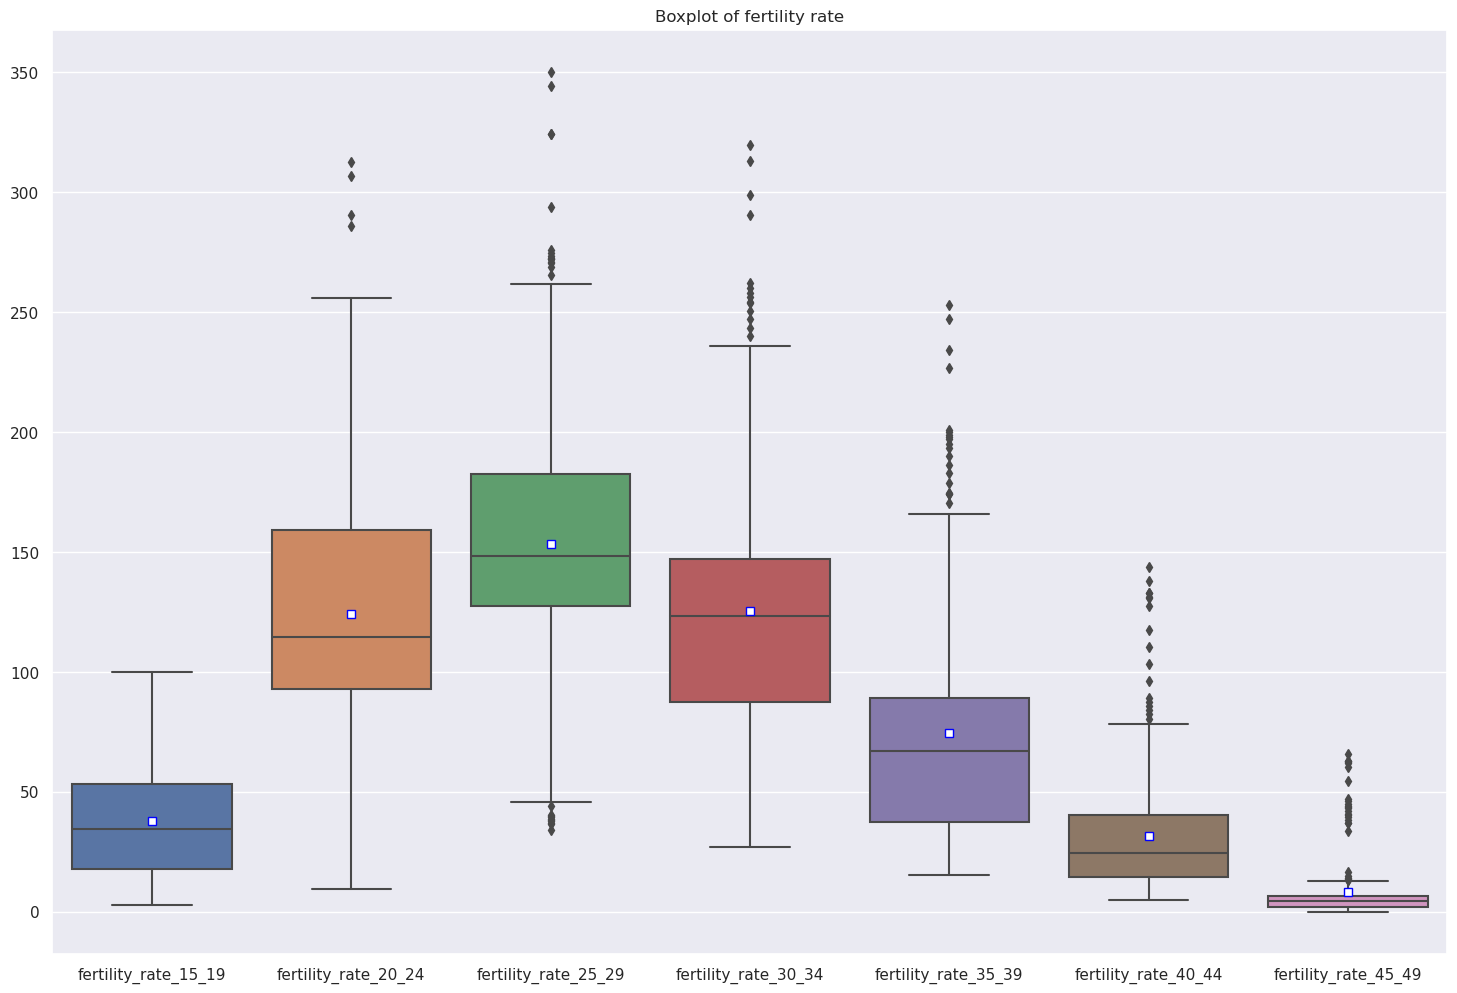

In [22]:
fig,ax=plt.subplots(figsize=(18,12))

sns.boxplot(data=detail_fertility.iloc[:,3:-3],showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},ax=ax)
ax.set_title("Boxplot of fertility rate")

plt.show()

#### Nhận xét:
- Tỉ lệ sinh sản ở các độ tuổi `20-24`, `25-29`, `30-34` và `35-39` có sự phân bố khá lớn.
- Tỉ lệ sinh sản trung bình cao nhất là từ `25-29` tuổi.
- Ngược lại thì độ tuổi `45-49` tỉ lệ thấp, có ít nến phân bố hẹp hơn hẳn so với các độ tuổi khác.



Dùng `biểu đồ đường kết hợp tương tác` để theo dõi sự thay đổi của tỉ lệ sinh sản theo độ tuổi qua các năm của các nước ASEAN:
- Các bước thực hiện:
    - Ở đây nhóm sử dụng hàm `interact` trong thư viện `ipywedgets` để có thể chọn độ tuổi của tỉ lệ sinh làm trục y của biểu đồ
    - Trong hàm `line_plot` thực hiện chọn, trích, biến đổi dữ liệu cho phù hợp để vẽ biểu đồ. Thêm các đường(quốc gia) vào biểu đồ. Thêm các chú thích cho biểu đồ.

In [23]:
# Chọn màu cho các nước
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff33cc', '#d62728']

def line_plot(attribute='fertility_rate_25_29'):
    # Chọn, biến đổi dữ liệu về dataframe với cột là các nước, dòng là năm
    temp_df=detail_fertility.pivot('year','country_name',attribute)
    temp_df=temp_df.sort_index().fillna(0)
    temp_df.reset_index(inplace=True)

    # Khởi tạo biểu đồ
    fig = go.Figure()

    # Thêm các đường thể hiện sự biến đổi của các quốc gia vào
    for i,col in zip(range(0,len(colors),1),temp_df.columns[1:]):
        fig.add_trace(go.Scatter(x=temp_df.year, y=temp_df[col], mode='lines', line=dict(color=colors[i]), name=col))

    # Hiển thị thông tin khi đưa con trỏ chuột vào
    fig.update_layout(hovermode='x')

    # Thiệt lập nhãn ở trục x và giới hạn cho trục y
    xtickvals = np.arange(1997, 2018, 1)
    xticktext = [str(year) for year in xtickvals]
    fig.update_xaxes(tickvals=xtickvals, ticktext=xticktext)
    fig.update_yaxes(range=[0, 375])
    
    # Thêm tên biểu đồ và nhãn chú thích phân biệt giữa các đường(quốc gia)
    inteval_age=re.findall(r'\d{2}',attribute)
    fig.update_layout(title='Fertility Age '+inteval_age[0]+' to '+inteval_age[1] + ' of ASEAN countries', xaxis_title='Year', yaxis_title=attribute)
    fig.update_layout(legend=dict(y=0.5, x=1.05))
    fig.show()

In [24]:
interact(line_plot,attribute=['fertility_rate_15_19','fertility_rate_20_24','fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44','fertility_rate_45_49'])

interactive(children=(Dropdown(description='attribute', index=2, options=('fertility_rate_15_19', 'fertility_r…

<function __main__.line_plot(attribute='fertility_rate_25_29')>

#### Nhận xét:
- Theo quan sát trên tất cả các độ tuổi thì tỉ lệ sinh sản có xu hướng giảm trên toàn bộ các nước trong ASEAN.
- Đông Timo là nước có độ biến đổi tỉ lệ sinh sản nhiều nhất, rơi vào những năm 1999 đến 2004 ở các nhóm độ tuổi `20-24` , `25-29` , `30-35` và `35-39`.
- Singapore là nước có tỉ lệ sinh sản thấp nhất ở hầu hết các độ tuổi.
- Việt Nam ta là nước có tỉ lệ sinh sản nằm ở tầm trung so với của các nước ASEAN. Tốc độ không cao, cũng không thấp.

Dùng `biểu đồ heatmap` để biểu diễn tương quan giữa tỉ lệ sinh sản giữa các độ tuổi với nhau:

In [25]:
corr_matrix_fertility=detail_fertility.iloc[:,2:-3].corr()
corr_matrix_fertility

,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49
year,1.000000,-0.258968,-0.283133,-0.222001,-0.179341,-0.203655,-0.225455,-0.131366
fertility_rate_15_19,-0.258968,1.000000,0.814928,0.574684,0.444138,0.499689,0.560094,0.449410
fertility_rate_20_24,-0.283133,0.814928,1.000000,0.893028,0.784326,0.817471,0.839673,0.712720
fertility_rate_25_29,-0.222001,0.574684,0.893028,1.000000,0.955047,0.924029,0.887207,0.737726
fertility_rate_30_34,-0.179341,0.444138,0.784326,0.955047,1.000000,0.978486,0.919692,0.779983
fertility_rate_35_39,-0.203655,0.499689,0.817471,0.924029,0.978486,1.000000,0.961476,0.861516
fertility_rate_40_44,-0.225455,0.560094,0.839673,0.887207,0.919692,0.961476,1.000000,0.908640
fertility_rate_45_49,-0.131366,0.449410,0.712720,0.737726,0.779983,0.861516,0.908640,1.000000


In [26]:
# Chọn màu cho các nước
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff33cc', '#d62728']

years_value=np.sort(detail_fertility.year.unique())
def heatmap_corr(year=2017):
    corr_matrix_fertility=detail_fertility[detail_fertility['year']==year].iloc[:,3:-3].corr()
    corr_matrix_fertility
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix_fertility, annot = True, cmap = 'Blues')
    plt.title("Correlation map", fontsize = 1)
interact(heatmap_corr,year=years_value)

interactive(children=(Dropdown(description='year', index=20, options=(1997, 1998, 1999, 2000, 2001, 2002, 2003…

<function __main__.heatmap_corr(year=2017)>

#### Nhận xét:
-  Trong tất cả các năm, tỉ lệ sinh sản giữa khoảng độ tuổi gần nhau (ví dụ [25-29] với [20-24] và với [20-34]) luôn đạt hệ số tương quan xấp xỉ 1. Chứng tỏ có có sự tương quan dương mạnh giữa tỉ lệ sinh sản của những độ tuổi sát nhau.
- Khi 1 tỉ lệ sinh sản của khoảng độ tuổi tăng, thì tỉ lệ sinh sản của khoảng độ tuổi liền trước và sau cũng tăng theo. Ta có thể giải thích mối tương quan này như sau, Khi tỉ lệ sinh sản của một khoảng độ tuổi tăng, sẽ tạo ra hệ quả là có nhiều trẻ em sinh ra trong khoảng đó, và khi trẻ em này trưởng thành và đến độ tuổi sinh sản, tỉ lệ sinh sản của khoảng độ tuổi liền trước và sau sẽ tăng lên.

Tính hệ số tương quan giữa độ tuổi với tỉ lệ sinh sản

In [27]:
def get_age_range(col_name):
    age = re.findall(r'\d{2}', col_name)
    return '[' + age[0] + '-' + age[1] + ']'

fertility_age_df_to_calc_spearman=detail_fertility.iloc[:,2:-3].melt(id_vars='year',value_name='fertility_rate',var_name='age').copy()
fertility_age_df_to_calc_spearman=fertility_age_df_to_calc_spearman.sort_values(['year','age','fertility_rate'])
fertility_age_df_to_calc_spearman.age=fertility_age_df_to_calc_spearman.age.apply(get_age_range)

spearman_age_fertility={'year':[],'corr_spearman':[]}
for year in np.sort(fertility_age_df_to_calc_spearman.year.unique()):
    calc_df_corr=fertility_age_df_to_calc_spearman[fertility_age_df_to_calc_spearman.year==year]
    corr_spearman = calc_df_corr['age'].corr(calc_df_corr['fertility_rate'], method='spearman')

    spearman_age_fertility['year'].append(year)
    spearman_age_fertility['corr_spearman'].append(corr_spearman)
spearman_age_fertility=pd.DataFrame(spearman_age_fertility)

In [28]:
spearman_age_fertility.iloc[spearman_age_fertility.corr_spearman.idxmin()]

year             2006.000000
corr_spearman      -0.463805
Name: 9, dtype: float64

In [29]:
spearman_age_fertility.iloc[spearman_age_fertility.corr_spearman.idxmax()]

year             2002.000000
corr_spearman      -0.424801
Name: 5, dtype: float64

Dùng `Biểu đồ Scatter` để xem phân bố giữa độ tuổi và tỉ lệ sinh sản qua các năm.

In [30]:

fig = px.scatter(fertility_age_df_to_calc_spearman, x='age', y='fertility_rate', animation_frame='year',color='age')
fig.update_yaxes(range=[0, 375])

fig.update_layout(title=f'Scatter Plot of Age and Fertility Rate Year')

fig.show()

#### Nhận xét:
- Dựa vào biểu đồ phân tán và kết quả hệ số Spearman giữa độ tuổi và tỉ lệ sinh sản ta thấy rằng: mối tương quan âm yếu, độ tuổi tăng thì tỉ lệ sinh sản giảm.
- Năm 2006(corr_spearman=-0.464) là năm mà tương quan giữa độ tuổi với tỉ lệ sinh sản là mạnh nhất trong 20 năm.
- Năm 2002(corr_spearman=-0.425) là năm mà tương quan giữa độ tuổi với tỉ lệ sinh sản là yếu nhất trong 20 năm.

### 3. Dựa vào các kết quả có trước các năm chạy lại thuật toán `ARIMA` để kiểm tra và đưa ra dự đoán cho tuổi thọ trung bình ở Việt Nam.

### **Xây dựng mô hình:**

- **Thuật toán sử dụng:**
    - `ARIMA`: là một mô hình dự báo chuỗi thời gian phổ biến được sử dụng để phân tích và dự báo các chuỗi dữ liệu không tuần hoàn.<br>

- **Bước thực hiện:**
    - Chia tập dữ liệu thành 2 phần: Test (Sau năm 2017), Train (Từ năm 2017 và trước năm 2017).
    - Chạy mô hình với tập dữ liệu Train.
        - Thực hiện chạy các giá trị p,d,q trong đoạn [0,2] để tìm ra các siêu tham số tốt nhất cho mô hình dự đoạn
    - Tính RMSE để đánh giá mô hình.

Chọn, trích dữ liệu

In [31]:
life_expectancy_arima=df.loc[:,['country_name','year','life_expectancy']].copy()
life_expectancy_arima=life_expectancy_arima[life_expectancy_arima.country_name=="Vietnam"].set_index('year').sort_index()
life_expectancy_arima=life_expectancy_arima.drop('country_name',axis=1)

Chia tập thành train và test

In [32]:
data_train=life_expectancy_arima.loc[:2018,:]

data_test=life_expectancy_arima.loc[2018:,:]

In [33]:
# Define the parameter grid for the grid search
param_grid = [(p, d, q) for p in np.arange(0,2) for d in np.arange(0,2) for q in np.arange(0,2)]

best_score, best_params, best_model = float("inf"), None, None
for param in param_grid:
    arima_model = ARIMA(data_train, order=param)
    arima_result = arima_model.fit()
    score = arima_result.aic
    if score < best_score:
        best_score, best_params, best_model = score, param, arima_result

In [34]:
print(f'Best parameters: {best_params}')
print(best_model.summary())

Best parameters: (1, 1, 1)
                               SARIMAX Results                                
Dep. Variable:        life_expectancy   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  80.830
Date:                Sat, 06 May 2023   AIC                           -155.660
Time:                        15:35:19   BIC                           -151.559
Sample:                             0   HQIC                          -154.376
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9960      0.011     94.500      0.000       0.975       1.017
ma.L1          0.7340      0.178      4.122      0.000       0.385       1.083
sigma2         0.0002   5

- Dựa vào kết quá phân tích ta thấy:
    - AIC: -155.66 thấp, mô hình dự đoán trên khá tốt.

In [35]:
n_forecast = 33
y_forecast = best_model.forecast(steps=n_forecast)

mse=mean_squared_error(data_test,y_forecast)
print("RMSE: ",np.sqrt(mse))

RMSE:  0.42789853107038545


#### Kết luận:
- Dựa vào giá trị RMSE = 0.428 và AIC= -1556.66, ta có thể kết luận rằng mô hình trên tốt

In [36]:
y_forecast

30    74.160138
31    74.399325
32    74.637564
33    74.874859
34    75.111214
35    75.346632
36    75.581118
37    75.814674
38    76.047306
39    76.279015
40    76.509807
41    76.739684
42    76.968650
43    77.196709
44    77.423865
45    77.650120
46    77.875479
47    78.099945
48    78.323522
49    78.546213
50    78.768022
51    78.988952
52    79.209006
53    79.428189
54    79.646503
55    79.863952
56    80.080540
57    80.296270
58    80.511144
59    80.725168
60    80.938343
61    81.150674
62    81.362164
Name: predicted_mean, dtype: float64

#### Nhận xét:
- Dựa theo kết quả dự đoán ta thấy rằng, tuổi thọ trung bình của nước ta càng ngày càng cao. Đến năm 2050 tuổi thọ trung bình dự đoán là hơn 81 tuổi, một mức cao.
- Dự đoán trên là có cơ sở, vừa dựa theo số liệu những năm trước đây và những yếu tố tác động đến tuổi thọ như: chăm sóc sức khỏe, chế độ ăn uống, điều kiện sống, môi trường, cơ sở hạ tầng bệnh viện y tế hiện tại của nước ta đang phát triển và đã được nâng cao hơn nhiều. Nên có những tác động tích cực đến tuổi thọ trung bình.
- Tuy nhiên vẫn có một số vấn đề khác như: ô nhiễm môi trường, thực phẩm bẩn tràn lan cũng là những yếu tố tác động đến tuổi thọ của chúng ta. Nên việc dự đoạn của mô hình trong khoảng cách thời gian lớn sẽ dễ dẫn đến sai số.